In [1]:
#import standard librirys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import re
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
data=pd.read_csv('/home/vinod/Downloads/FashionDataset.csv')
data.head()

,Unnamed: 0,BrandName,Deatils,Sizes,MRP,SellPrice,Discount,Category
0,0,life,solid cotton blend collar neck womens a-line d...,"Size:Large,Medium,Small,X-Large,X-Small",Rs\n1699,849,50% off,Westernwear-Women
1,1,only,polyester peter pan collar womens blouson dres...,"Size:34,36,38,40",Rs\n3499,2449,30% off,Westernwear-Women
2,2,fratini,solid polyester blend wide neck womens regular...,"Size:Large,X-Large,XX-Large",Rs\n1199,599,50% off,Westernwear-Women
3,3,zink london,stripes polyester sweetheart neck womens dress...,"Size:Large,Medium,Small,X-Large",Rs\n2299,1379,40% off,Westernwear-Women
4,4,life,regular fit regular length denim womens jeans ...,"Size:26,28,30,32,34,36",Rs\n1699,849,50% off,Westernwear-Women


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30758 entries, 0 to 30757
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  30758 non-null  int64 
 1   BrandName   30758 non-null  object
 2   Deatils     30758 non-null  object
 3   Sizes       30758 non-null  object
 4   MRP         30758 non-null  object
 5   SellPrice   30758 non-null  object
 6   Discount    30758 non-null  object
 7   Category    30758 non-null  object
dtypes: int64(1), object(7)
memory usage: 1.9+ MB


In [4]:
data.describe()

,Unnamed: 0
count,30758.000000
mean,12.500000
std,7.500122
min,0.000000
25%,6.000000
50%,12.500000
75%,19.000000
max,25.000000


In [5]:
#Checking the null values
data.isna().sum()

Unnamed: 0    0
BrandName     0
Deatils       0
Sizes         0
MRP           0
SellPrice     0
Discount      0
Category      0
dtype: int64

In [6]:
data.columns

Index(['Unnamed: 0', 'BrandName', 'Deatils', 'Sizes', 'MRP', 'SellPrice',
       'Discount', 'Category'],
      dtype='object')

In [7]:
#drop the unecessary columns from the dataset
data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [8]:
data.replace('Nan',np.nan,inplace=True)
data.dropna(axis=0,inplace=True)

# Feature Engineering

In [9]:
#Cleaning the data 
data['MRP'] = data['MRP'].str.replace('Rs\n','')
data['MRP'] = data['MRP'].astype(int)
data['SellPrice'] = data['SellPrice'].astype(int)
data['Sizes'] = data['Sizes'].str.replace('Size:','')

In [10]:
data.describe().T.style.background_gradient(cmap='YlOrRd')

,count,mean,std,min,25%,50%,75%,max
MRP,18374.000000,2136.928704,1189.416850,171.000000,1299.000000,1899.000000,2663.000000,16999.000000
SellPrice,18374.000000,1163.798846,744.201506,114.000000,659.000000,995.000000,1469.000000,13599.000000


[Text(0.5, 1.0, 'The correlation Heatmap')]

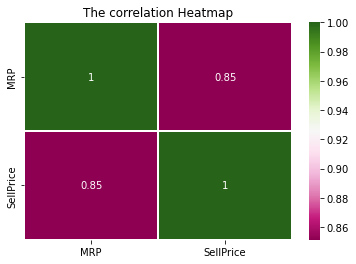

In [11]:
#Heatmap to show the correlation between the variabels
sns.heatmap(data.corr(),annot=True,cmap='PiYG',linewidths=0.4).set(title="The correlation Heatmap")


In [12]:
data.head()

,BrandName,Deatils,Sizes,MRP,SellPrice,Discount,Category
0,life,solid cotton blend collar neck womens a-line d...,"Large,Medium,Small,X-Large,X-Small",1699,849,50% off,Westernwear-Women
1,only,polyester peter pan collar womens blouson dres...,"34,36,38,40",3499,2449,30% off,Westernwear-Women
2,fratini,solid polyester blend wide neck womens regular...,"Large,X-Large,XX-Large",1199,599,50% off,Westernwear-Women
3,zink london,stripes polyester sweetheart neck womens dress...,"Large,Medium,Small,X-Large",2299,1379,40% off,Westernwear-Women
4,life,regular fit regular length denim womens jeans ...,"26,28,30,32,34,36",1699,849,50% off,Westernwear-Women


# EDA Process

In [13]:
text = " ".join(i for i in data['Sizes'])

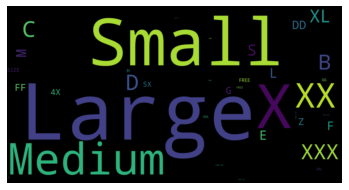

In [14]:
word_cloud1 = WordCloud(collocations = False, background_color = 'black',width = 2048, height = 1080).generate(text)
plt.imshow(word_cloud1, interpolation='bilinear')
plt.axis("off")
plt.show()

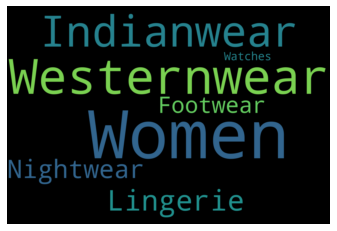

In [15]:
text_1=" ".join(i for i in data['Category'])
word_cloud1=WordCloud(collocations = False, background_color = 'black',width = 2048, height = 1380).generate(text_1)
plt.imshow(word_cloud1,interpolation='bilinear',cmap='hot')
plt.axis("off")
plt.show()

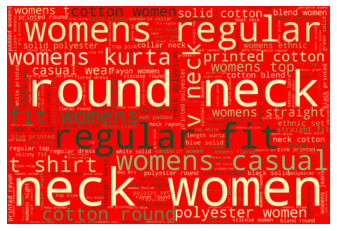

In [16]:
text=" ".join(i for i in data['Deatils'])
word=WordCloud(collocations=True,colormap='YlGn',background_color = 'red',width = 2048, height = 1380).generate(text)
plt.imshow(word,interpolation='bilinear')
plt.axis('off')
plt.show()

# No of the Categroys in the dataset using the countplot 

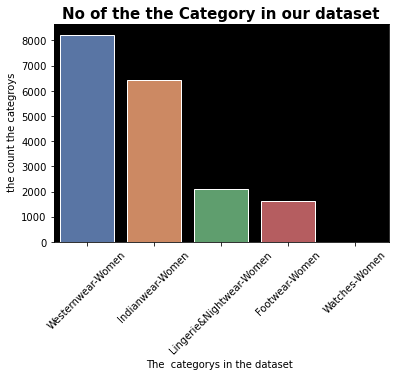

In [17]:
ax=plt.axes()
#set background color
ax.set(facecolor='black')
#set the parameters figure size and style
sns.set(rc={'figure.figsize':(14,9)},style='darkgrid')
#set the title with bold size and fontsize 
ax.set_title("No of the the Category in our dataset",fontsize=15,fontweight="bold")
sns.countplot(x=data['Category'])
plt.xlabel("The  categorys in the dataset ")
#plot labels for rotation
plt.xticks(rotation=45)
plt.ylabel(" the count the categroys")
plt.show()

# Visualization of the the outliers using the box plot 

/home/vinod/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


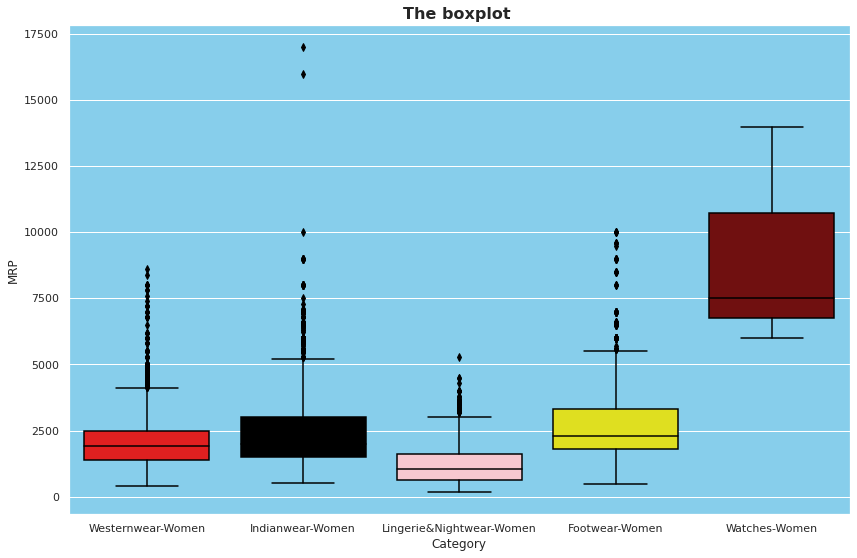

In [18]:
ax=plt.axes()
#set background color
ax.set(facecolor='skyblue')
sns.set(rc={'figure.figsize':(27,9)},style='darkgrid')
ax.set_title("The boxplot ",fontsize=16,fontweight='bold')
sns.boxplot(data['Category'],data['MRP'],palette=['Red','black','pink','yellow','maroon'])
plt.show()

/home/vinod/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


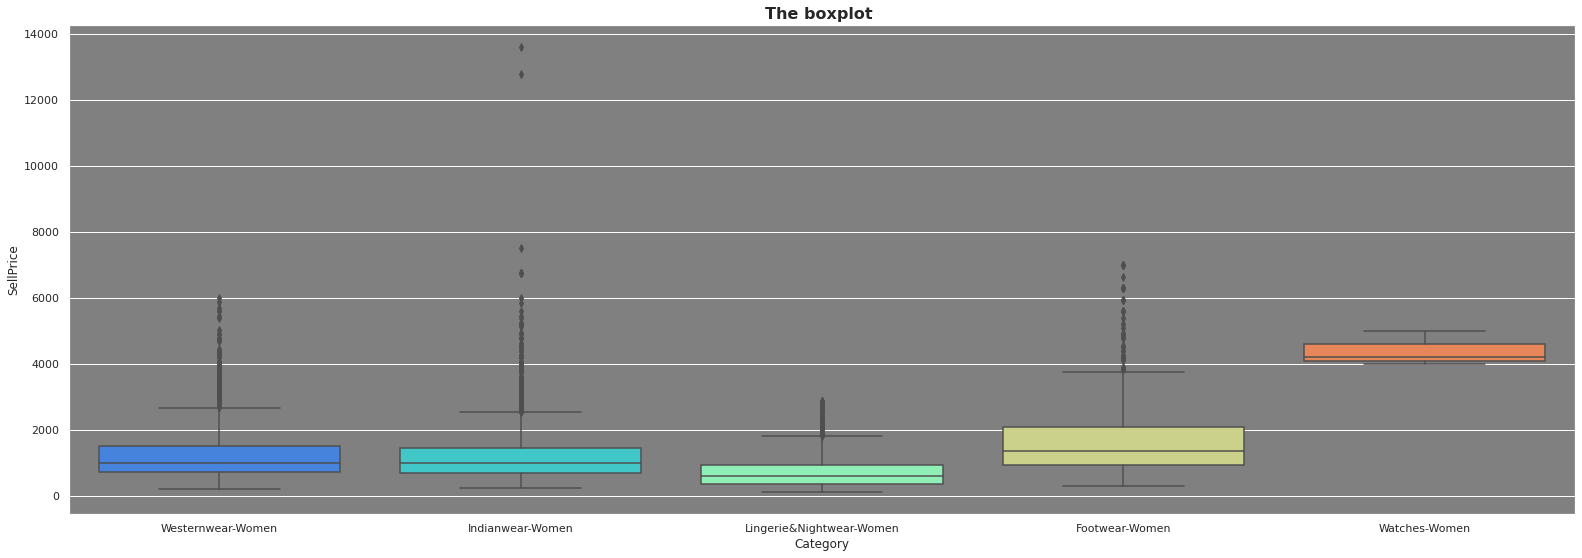

In [19]:
ax=plt.axes()
ax.set(facecolor='grey')
sns.set(rc={'figure.figsize':(19,9)},style='darkgrid')
ax.set_title("The boxplot ",fontsize=16,fontweight='bold')
sns.boxplot(data['Category'],data['SellPrice'],palette='rainbow')
plt.show()

# Visualization of the scatter plot using the seaborn and find the relations between the two variabels

/home/vinod/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


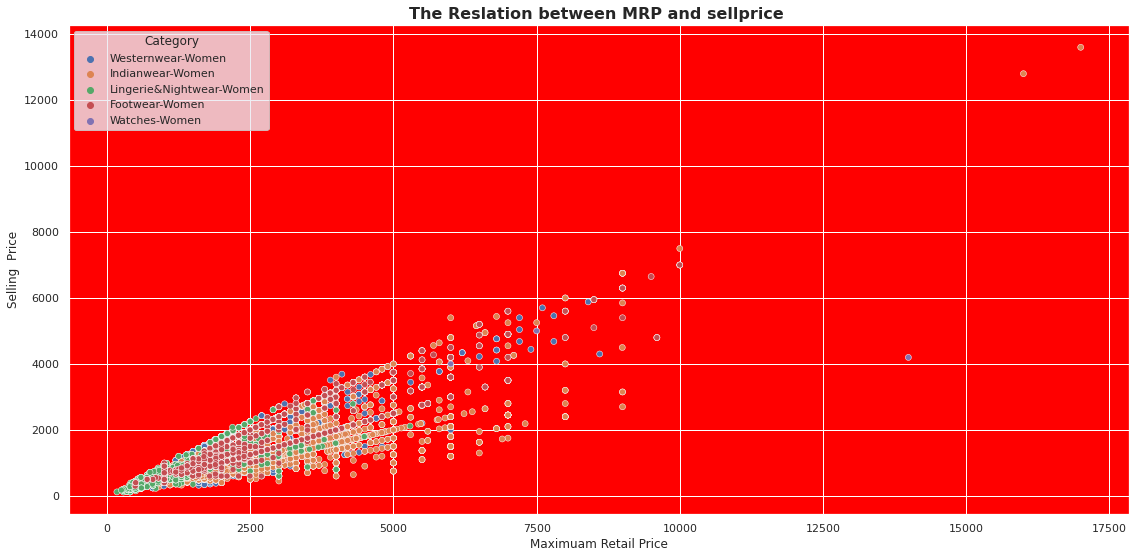

In [20]:
ax=plt.axes()
ax.set(facecolor='red')
sns.set(rc={'figure.figsize':(19,6)},style='darkgrid')
ax.set_title("The Reslation between MRP and sellprice ",fontsize=16,fontweight='bold')
sns.scatterplot(data['MRP'],data['SellPrice'],hue=data['Category'])
plt.xlabel("Maximuam Retail Price")
plt.ylabel("Selling  Price")
plt.show()

# To see the Maximum discount in the dataset

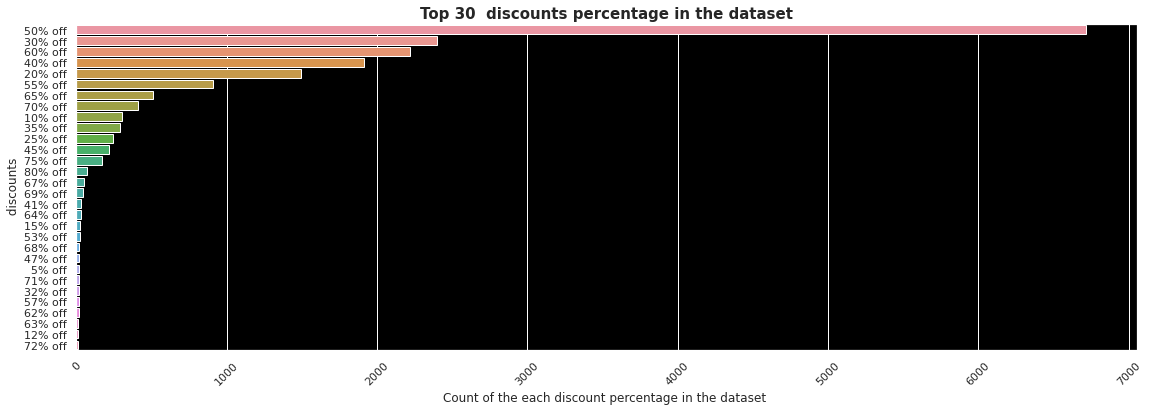

In [21]:
discount=data['Discount'].value_counts()[:30]
ax=plt.axes()
ax.set(facecolor='black')
sns.set(rc={'figure.figsize':(14,9)},style='darkgrid')
ax.set_title("Top 30  discounts percentage in the dataset",fontsize=15,fontweight="bold")
sns.barplot(y=discount.index,x=discount)
plt.xlabel("Count of the each discount percentage in the dataset ")
plt.xticks(rotation=45)
plt.ylabel(" discounts")
plt.show()

# Top 20 brands in the dataset using the pie chart

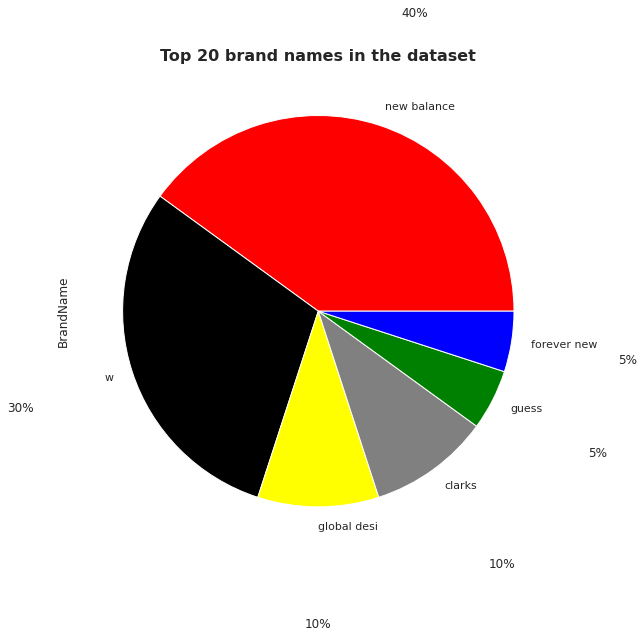

In [22]:
costly = data.sort_values(by='SellPrice',ascending=False).head(20)
costly['BrandName'].value_counts().plot(kind='pie',autopct='%1.0f%%',colors=['Red','Black','yellow','grey','green','blue'],labeldistance=1.1,pctdistance=1.6)
plt.title("Top 20 brand names in the dataset",fontsize=16,fontweight='bold')
plt.show()

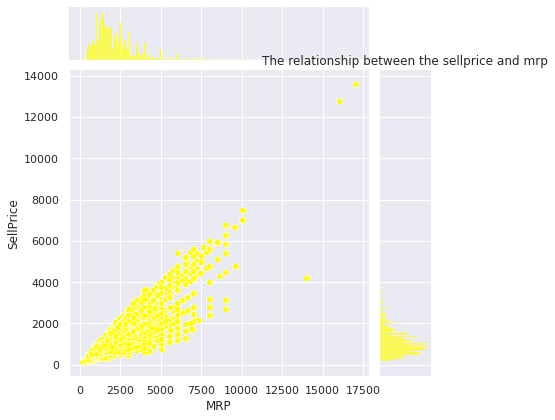

In [23]:
sns.jointplot(x=data['MRP'],y=data['SellPrice'],kind='scatter',color='yellow',palette='rainbow')
plt.title("The relationship between the sellprice and mrp")
plt.show()

In [24]:
data.head()

,BrandName,Deatils,Sizes,MRP,SellPrice,Discount,Category
0,life,solid cotton blend collar neck womens a-line d...,"Large,Medium,Small,X-Large,X-Small",1699,849,50% off,Westernwear-Women
1,only,polyester peter pan collar womens blouson dres...,"34,36,38,40",3499,2449,30% off,Westernwear-Women
2,fratini,solid polyester blend wide neck womens regular...,"Large,X-Large,XX-Large",1199,599,50% off,Westernwear-Women
3,zink london,stripes polyester sweetheart neck womens dress...,"Large,Medium,Small,X-Large",2299,1379,40% off,Westernwear-Women
4,life,regular fit regular length denim womens jeans ...,"26,28,30,32,34,36",1699,849,50% off,Westernwear-Women


In [25]:
data['Deatils']=data['Deatils'].str.lower()
data['Deatils']

0        solid cotton blend collar neck womens a-line d...
1        polyester peter pan collar womens blouson dres...
2        solid polyester blend wide neck womens regular...
3        stripes polyester sweetheart neck womens dress...
4        regular fit regular length denim womens jeans ...
                               ...                        
26673       womens casual wear buckle closure flats - navy
26674             womens casual wear slip on heels - black
26885                       womens analogue metallic watch
27290    womens rose gold dial stainless steel analogue...
28418    womens silver dial stainless steel analogue wa...
Name: Deatils, Length: 18374, dtype: object

In [26]:
data.head()

,BrandName,Deatils,Sizes,MRP,SellPrice,Discount,Category
0,life,solid cotton blend collar neck womens a-line d...,"Large,Medium,Small,X-Large,X-Small",1699,849,50% off,Westernwear-Women
1,only,polyester peter pan collar womens blouson dres...,"34,36,38,40",3499,2449,30% off,Westernwear-Women
2,fratini,solid polyester blend wide neck womens regular...,"Large,X-Large,XX-Large",1199,599,50% off,Westernwear-Women
3,zink london,stripes polyester sweetheart neck womens dress...,"Large,Medium,Small,X-Large",2299,1379,40% off,Westernwear-Women
4,life,regular fit regular length denim womens jeans ...,"26,28,30,32,34,36",1699,849,50% off,Westernwear-Women


In [27]:
#to convert the details to arry using the nltk library
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/vinod/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [28]:
# to clean the data
port_set=PorterStemmer()
#Creating a function for clean_text
def steamming(clean_text):
    stemmed_content=re.sub('[^a-zA-Z]',' ',clean_text)
    stemmed_content=stemmed_content.lower()
    stemmed_content=stemmed_content.split()
    stemmed_content=[port_set.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content=' '.join(stemmed_content)
    return stemmed_content

In [29]:

data['Deatils']=data['Deatils'].apply(steamming)

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [31]:
#convert the cleantext to arry using the TfidfVectorizer
vector=TfidfVectorizer()
vector.fit(data['Deatils'])
data['Deatils']=vector.transform(data['Deatils']).shape[0]

In [32]:
#Convert the categorys to the numerical using the labelencoder
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
data['Discount']=label.fit_transform(data['Discount'])
data['BrandName']=label.fit_transform(data['BrandName'])
data['Category']=label.fit_transform(data['Category'])
data['Discount']=label.fit_transform(data['Discount'])
data['Sizes']=label.fit_transform(data['Sizes'])

# Model bulding 


# Divide the data in to X and y after that we train and test the model evoluation

In [33]:
X=data.drop(['MRP'],axis=1)
y=data['MRP']

In [34]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [35]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(13780, 6)
(13780,)
(4594, 6)
(4594,)


In [36]:
from sklearn.tree import DecisionTreeClassifier

# We use the Linearregression algorithm to predict the mrp

In [37]:
#intilise the model and fit the model X_train,y_train
linear=LinearRegression(copy_X=True,
    n_jobs=1000)
linear.fit(X_train,y_train)

LinearRegression(n_jobs=1000)

In [38]:
# To predict the values 
y_pred=linear.predict(X_test)

In [39]:
y_pred

array([1524.74755948,  783.47389879, 1093.10395288, ...,  603.36203935,
       1204.50220111, 1113.86085913])

# Model score 

In [40]:
#Model test score 
print("The test score is {}".format(linear.score(X_test,y_test)))
#Model train score 
print("The train score is {}".format(linear.score(X_train,y_train)))

The test score is 0.9277785522483334
The train score is 0.9278087232952693


In [41]:
# linear model coefficent
linear.coef_

array([ 1.22214237e+00, -1.15463195e-14,  1.35898740e-02,  1.69788352e+00,
        4.44075719e+01, -2.30122715e+01])

In [42]:
linear.intercept_

-1133.6795489579567

In [43]:
from sklearn.metrics import mean_squared_error,r2_score

In [44]:
# To predict the Root mean squared error
print("The mean_squared_error is {}".format(mean_squared_error(y_test,y_pred)))
# To find the r2_score
print("The mean_squared_error is {}".format(r2_score(y_test,y_pred)))

The mean_squared_error is 96228.4480073289
The mean_squared_error is 0.9277785522483334


In [45]:
tree=DecisionTreeClassifier(criterion='entropy',splitter='best',
    max_depth=150)
tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=150)

In [46]:
print("The test score is {}".format(tree.score(X_test,y_test)))
print("The train score is {}".format(tree.score(X_train,y_train)))

The test score is 0.9212015672616456
The train score is 0.9983309143686502


In [47]:
params={'fit_intercept':[True,False],'normalize':[True,False],'copy_X':[True,False],'n_jobs':[100,200,300,400,500]}
    

In [48]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
grid=GridSearchCV(estimator=linear,param_grid=params,scoring='r2',
    n_jobs=10,
    refit=True,
    cv=5)
grid.fit(X_train,y_train)


/home/vinod/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/home/vinod/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pip

GridSearchCV(cv=5, estimator=LinearRegression(n_jobs=1000), n_jobs=10,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'n_jobs': [100, 200, 300, 400, 500],
                         'normalize': [True, False]},
             scoring='r2')

In [49]:
print("The test score is {} ".format(grid.score(X_test,y_test)))
print("The train score is {} ".format(grid.score(X_train,y_train)))

The test score is 0.9277785522483334 
The train score is 0.9278087232952693 


Text(0, 0.5, 'Predictions')

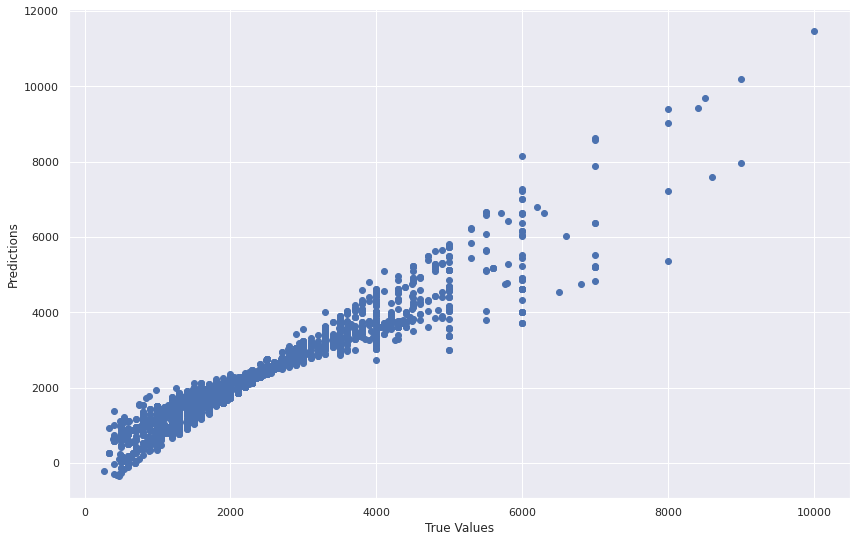

In [50]:
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")

# Conclusion 

# Finaly we get the 92% accuracy_score so our model is good

In [55]:
# To predict the Root mean squared error
print("The mean_squared_error is {}".format(mean_squared_error(y_test,y_pred)))
# To find the r2_score
print("The mean_squared_error is {:.2f}".format(r2_score(y_test,y_pred)*100))
#Model test score 
print("The linearregression model test score is {:.2f}".format(linear.score(X_test,y_test)*100))
#Model train score 
print("The linearregression model train score is {:.2f}".format(linear.score(X_train,y_train)*100))
#To find the test score in hyperparameter turning in gridsearchcv
print("The gridsearchcv model test score is {:.2f} ".format(grid.score(X_test,y_test)*100))
#Model train score 
print("The gridsearchcv train score is {:.2f} ".format(grid.score(X_train,y_train)*100))


The mean_squared_error is 96228.4480073289
The mean_squared_error is 92.78
The linearregression model test score is 92.78
The linearregression model train score is 92.78
The gridsearchcv model test score is 92.78 
The gridsearchcv train score is 92.78 
